In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# import sys
# sys.path.insert(0, 'REPLACE_WITH_PWD')

import os
os.getcwd() # set current pwd as working directory

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [14]:
color_palette = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']

In [4]:
ds = pd.read_csv('/Users/hwu/Dropbox/zOB_share/playlist_summary_analysis/data/top_1000_playlist.tsv', sep='\t', encoding='utf-8')

In [7]:
ds.describe()

,streams,stream30s,dau,wau,mau,mau_previous_month,mau_both_months,users,skippers,n_tracks,n_local_tracks,n_artists,n_albums,monthly_stream30s,monthly_owner_stream30s,x_estimated_revenue_usd,x_ratio_streams_above_30s_threshold,x_retention_rate_m,x_ratio_skippers_d,x_projected_engaging_time_in_min,x_projected_engaging_time_in_hour,x_projected_engaging_time_in_day,x_mininum_engaing_time_per_user
count,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.411669e+04,1.452965e+04,1488.554000,7683.632000,2.348770e+04,2.063014e+04,4525.832000,5.323631e+04,982.564000,242.398000,2.761000,110.736000,118.113000,4.218787e+05,255.672000,101.707515,0.647392,0.207388,0.020798,848.393000,14.140460,0.589030,2.846130
std,1.282049e+05,7.439935e+04,7055.772199,31522.912696,9.215211e+04,7.408524e+04,24521.356161,1.780281e+05,4001.697274,557.928696,24.223432,167.441736,189.144114,2.092872e+06,1454.357316,520.795439,0.171505,0.166568,0.037949,1952.750437,32.545963,1.356006,19.465174
min,5.090000e+02,5.000000e+02,1.000000,1.000000,2.000000e+00,0.000000e+00,0.000000,3.000000e+00,0.000000,1.000000,0.000000,1.000000,1.000000,8.600000e+02,0.000000,3.500000,0.082200,0.000000,0.000000,3.500000,0.060000,0.000000,0.010000
25%,1.198250e+03,7.395000e+02,69.000000,333.750000,9.857500e+02,8.065000e+02,140.000000,2.045750e+03,31.000000,56.000000,0.000000,32.000000,32.000000,2.110425e+04,0.000000,5.176500,0.517875,0.119875,0.011200,196.000000,3.270000,0.140000,0.080000
50%,2.508500e+03,1.458500e+03,143.000000,771.500000,2.470000e+03,1.915500e+03,345.000000,5.671500e+03,101.000000,111.500000,0.000000,64.000000,66.000000,4.406600e+04,4.000000,10.209500,0.649700,0.167850,0.015800,390.250000,6.505000,0.270000,0.140000
75%,9.430750e+03,5.834500e+03,655.000000,4147.000000,1.281825e+04,1.020500e+04,1564.500000,2.998750e+04,514.000000,236.250000,0.000000,125.000000,132.000000,1.820130e+05,41.250000,40.841500,0.767850,0.234100,0.021300,826.875000,13.785000,0.572500,0.250000
max,2.629715e+06,1.513237e+06,152929.000000,669966.000000,1.944150e+06,1.478684e+06,578391.000000,3.455406e+06,86162.000000,12183.000000,615.000000,2177.000000,2806.000000,4.249733e+07,25904.000000,10592.659000,1.000000,1.000000,0.766100,42640.500000,710.680000,29.610000,485.060000


In [8]:
ds.describe().to_csv('/Users/hwu/Dropbox/zOB_share/playlist_summary_analysis/data/top_1000_playlist_stats.tsv', sep='\t')

In [9]:
df_dau = ds[ds['dau'] <= 655]

In [12]:
df_dau.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 195 to 999
Data columns (total 37 columns):
playlist_id                            750 non-null object
owner_id                               750 non-null object
x_owner_group                          750 non-null object
streams                                750 non-null int64
stream30s                              750 non-null int64
dau                                    750 non-null int64
wau                                    750 non-null int64
mau                                    750 non-null int64
mau_previous_month                     750 non-null int64
mau_both_months                        750 non-null int64
users                                  750 non-null int64
skippers                               750 non-null int64
owner_country                          750 non-null object
n_tracks                               750 non-null int64
n_local_tracks                         750 non-null int64
n_artists          

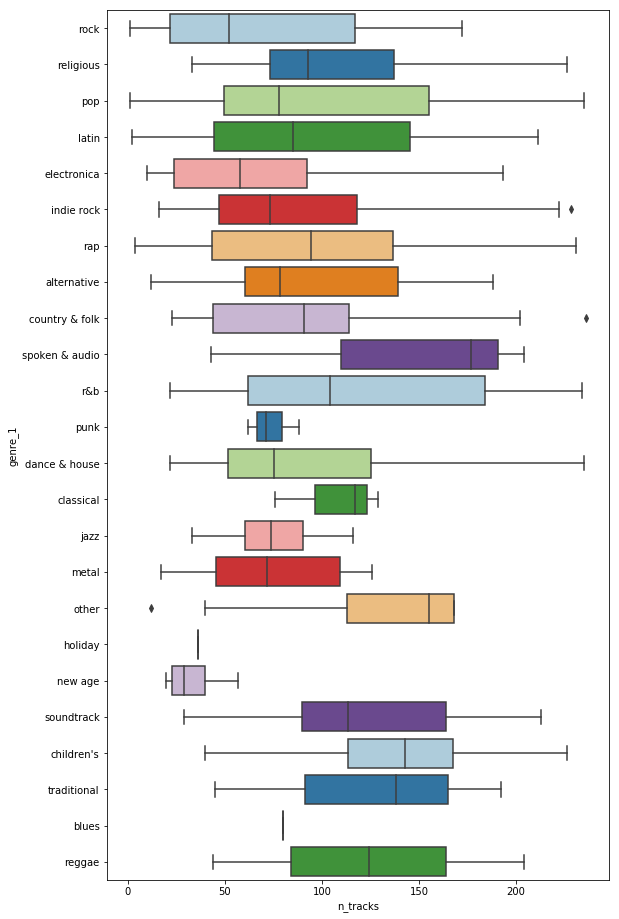

In [43]:
f, ax = plt.subplots(figsize=(9,16))
sb.boxplot(x='n_tracks', y='genre_1', data=df_dau[df_dau['n_tracks'] <= 236], palette=color_palette)

In [16]:
df_cluster_1 = ds[ds['genre_1'].isin(['pop', 'indie rock', 'dance & house', 'rap']) ]

In [17]:
set(df_cluster_1['genre_1'])

{u'dance & house', u'indie rock', u'pop', u'rap'}

In [18]:
df_cluster_1.describe()

,streams,stream30s,dau,wau,mau,mau_previous_month,mau_both_months,users,skippers,n_tracks,n_local_tracks,n_artists,n_albums,monthly_stream30s,monthly_owner_stream30s,x_estimated_revenue_usd,x_ratio_streams_above_30s_threshold,x_retention_rate_m,x_ratio_skippers_d,x_projected_engaging_time_in_min,x_projected_engaging_time_in_hour,x_projected_engaging_time_in_day,x_mininum_engaing_time_per_user
count,4.910000e+02,4.910000e+02,491.000000,491.000000,4.910000e+02,4.910000e+02,491.000000,4.910000e+02,491.000000,491.000000,491.000000,491.000000,491.000000,4.910000e+02,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,3.897976e+04,2.311874e+04,2337.551935,11651.334012,3.518005e+04,3.128297e+04,7258.723014,7.937030e+04,1522.260692,252.885947,2.942974,139.480652,144.562118,6.575954e+05,211.989817,161.831189,0.594526,0.204552,0.022665,885.100815,14.752200,0.614521,1.363829
std,1.797517e+05,1.041191e+05,9827.970771,43422.562716,1.264765e+05,1.006075e+05,34172.007795,2.410075e+05,5500.331597,490.826129,19.023745,204.529278,227.413517,2.915858e+06,1520.536986,728.833941,0.172504,0.121127,0.037519,1717.891452,28.631586,1.193024,10.074617
min,5.800000e+02,5.000000e+02,1.000000,1.000000,2.000000e+00,0.000000e+00,0.000000,3.000000e+00,0.000000,1.000000,0.000000,1.000000,1.000000,8.600000e+02,0.000000,3.500000,0.082200,0.000000,0.000000,3.500000,0.060000,0.000000,0.010000
25%,1.416500e+03,8.075000e+02,82.000000,411.500000,1.319500e+03,1.020500e+03,198.000000,2.857000e+03,52.000000,60.000000,0.000000,46.000000,45.500000,2.381500e+04,0.000000,5.652500,0.466650,0.129100,0.013600,210.000000,3.500000,0.150000,0.080000
50%,3.605000e+03,1.938000e+03,213.000000,1064.000000,3.653000e+03,2.851000e+03,565.000000,9.277000e+03,172.000000,109.000000,0.000000,81.000000,85.000000,5.897100e+04,4.000000,13.566000,0.579700,0.179300,0.017900,381.500000,6.360000,0.260000,0.130000
75%,1.631650e+04,8.857000e+03,1081.500000,5875.000000,1.960250e+04,1.608600e+04,2439.500000,4.665800e+04,836.500000,256.000000,0.000000,171.000000,166.500000,2.527405e+05,32.000000,61.999000,0.719900,0.248700,0.023700,896.000000,14.930000,0.620000,0.220000
max,2.629715e+06,1.513237e+06,152929.000000,669966.000000,1.944150e+06,1.478684e+06,578391.000000,3.455406e+06,86162.000000,6658.000000,322.000000,2177.000000,2806.000000,4.249733e+07,25904.000000,10592.659000,1.000000,1.000000,0.766100,23303.000000,388.380000,16.180000,141.830000


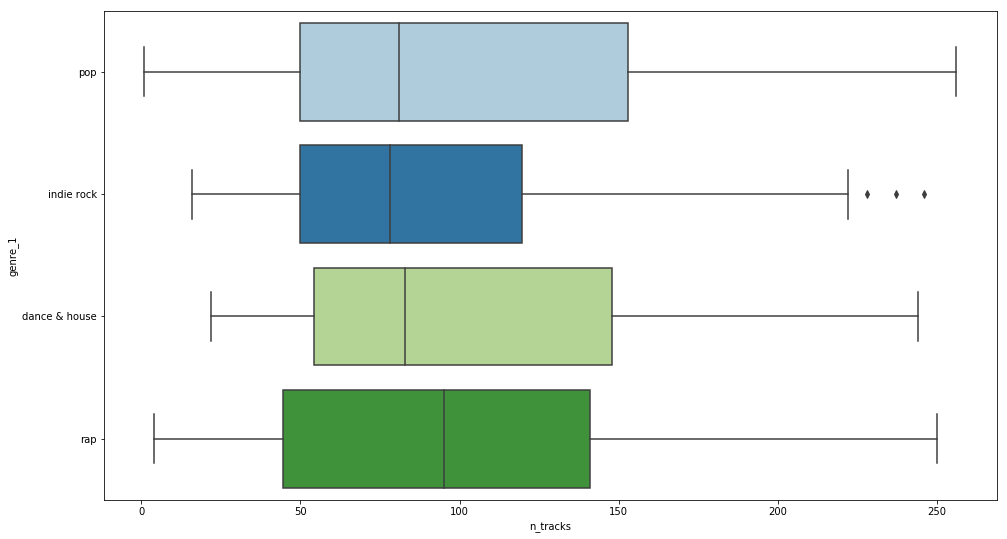

In [21]:
f, ax = plt.subplots(figsize=(16,9))
sb.boxplot(x='n_tracks', y='genre_1', data=df_cluster_1[df_cluster_1['n_tracks'] <= 256], palette=color_palette)
# take out extreme values above 75th percentile

In [26]:
df_cluster_1.groupby(['genre_1'])[['n_tracks']].median()

,n_tracks
genre_1,
dance & house,145.5
indie rock,100.0
pop,106.0
rap,118.5


In [27]:
df_cluster_1[(df_cluster_1['n_tracks'] <= 256) & (df_cluster_1['genre_1'] == 'pop')].describe()

,streams,stream30s,dau,wau,mau,mau_previous_month,mau_both_months,users,skippers,n_tracks,n_local_tracks,n_artists,n_albums,monthly_stream30s,monthly_owner_stream30s,x_estimated_revenue_usd,x_ratio_streams_above_30s_threshold,x_retention_rate_m,x_ratio_skippers_d,x_projected_engaging_time_in_min,x_projected_engaging_time_in_hour,x_projected_engaging_time_in_day,x_mininum_engaing_time_per_user
count,1.370000e+02,1.370000e+02,137.000000,137.000000,1.370000e+02,1.370000e+02,137.000000,1.370000e+02,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,8.189818e+04,4.819093e+04,4654.087591,21492.905109,6.400508e+04,5.232745e+04,14324.467153,1.309386e+05,2758.153285,101.270073,1.102190,71.430657,75.000000,1.314636e+06,126.729927,337.336489,0.600958,0.182840,0.019991,354.445255,5.907737,0.245985,0.323869
std,3.254782e+05,1.878223e+05,17595.178480,76241.351146,2.211601e+05,1.633373e+05,60637.724857,3.963671e+05,9569.229302,65.420866,9.359082,48.321350,52.409586,5.215910e+06,849.249864,1314.756307,0.152355,0.091874,0.014448,228.973032,3.816004,0.158988,1.867445
min,6.150000e+02,5.000000e+02,1.000000,1.000000,2.000000e+00,0.000000e+00,0.000000,1.400000e+01,1.000000,1.000000,0.000000,1.000000,1.000000,5.505000e+03,0.000000,3.500000,0.271600,0.000000,0.005900,3.500000,0.060000,0.000000,0.010000
25%,1.602000e+03,8.330000e+02,89.000000,483.000000,1.537000e+03,1.336000e+03,217.000000,3.557000e+03,63.000000,50.000000,0.000000,39.000000,39.000000,2.800200e+04,0.000000,5.831000,0.486300,0.126500,0.012600,175.000000,2.920000,0.120000,0.080000
50%,3.926000e+03,2.178000e+03,262.000000,1595.000000,4.923000e+03,4.010000e+03,608.000000,1.207200e+04,230.000000,81.000000,0.000000,62.000000,63.000000,6.505700e+04,1.000000,15.246000,0.594600,0.167100,0.016600,283.500000,4.730000,0.200000,0.120000
75%,2.285500e+04,1.304100e+04,1524.000000,8315.000000,2.577900e+04,2.709000e+04,4023.000000,7.113600e+04,1353.000000,153.000000,0.000000,94.000000,99.000000,4.112470e+05,24.000000,91.287000,0.712500,0.223300,0.022700,535.500000,8.930000,0.370000,0.190000
max,2.629715e+06,1.513237e+06,152929.000000,669966.000000,1.944150e+06,1.478684e+06,578391.000000,3.455406e+06,86162.000000,256.000000,109.000000,228.000000,242.000000,4.249733e+07,9170.000000,10592.659000,0.998400,0.604600,0.121000,896.000000,14.930000,0.620000,21.930000


In [28]:
df_cluster_1[(df_cluster_1['n_tracks'] <= 256) & (df_cluster_1['genre_1'] == 'indie rock')].describe()

,streams,stream30s,dau,wau,mau,mau_previous_month,mau_both_months,users,skippers,n_tracks,n_local_tracks,n_artists,n_albums,monthly_stream30s,monthly_owner_stream30s,x_estimated_revenue_usd,x_ratio_streams_above_30s_threshold,x_retention_rate_m,x_ratio_skippers_d,x_projected_engaging_time_in_min,x_projected_engaging_time_in_hour,x_projected_engaging_time_in_day,x_mininum_engaing_time_per_user
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,9.800000e+01,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,29589.224490,21700.765306,2071.316327,13601.193878,40202.979592,35898.285714,7146.357143,94657.642857,1353.673469,93.938776,0.071429,67.795918,73.938776,7.213418e+05,12.969388,151.905357,0.708307,0.177135,0.017476,328.785714,5.480510,0.228265,0.145306
std,51882.573636,41772.735509,3396.146077,23480.629275,66103.563473,67014.727874,16450.271434,156523.543697,2106.232958,57.633899,0.436717,45.519444,49.309002,1.455479e+06,41.518709,292.409149,0.116265,0.113225,0.013217,201.718647,3.362102,0.140390,0.129417
min,716.000000,532.000000,26.000000,105.000000,280.000000,0.000000,0.000000,476.000000,4.000000,16.000000,0.000000,1.000000,1.000000,8.260000e+03,0.000000,3.724000,0.377000,0.000000,0.004400,56.000000,0.930000,0.040000,0.010000
25%,2386.750000,1457.750000,166.750000,991.250000,3989.250000,1554.500000,338.250000,9337.500000,132.750000,50.000000,0.000000,41.000000,44.250000,4.621875e+04,0.000000,10.204250,0.644550,0.106075,0.009900,175.000000,2.920000,0.120000,0.060000
50%,7446.500000,5544.500000,607.000000,3740.000000,14816.500000,9140.500000,1208.000000,31537.000000,404.000000,78.000000,0.000000,58.500000,64.000000,1.881490e+05,1.000000,38.811500,0.741200,0.160600,0.014300,273.000000,4.550000,0.190000,0.110000
75%,33112.500000,24368.750000,2513.000000,14289.500000,43447.500000,31299.000000,5634.250000,100225.000000,1793.250000,119.500000,0.000000,83.750000,91.250000,7.128085e+05,5.500000,170.581250,0.781375,0.208725,0.019675,418.250000,6.970000,0.290000,0.167500
max,353630.000000,322268.000000,19029.000000,143516.000000,352464.000000,395305.000000,101214.000000,910599.000000,12187.000000,246.000000,4.000000,208.000000,229.000000,1.053618e+07,329.000000,2255.876000,0.933000,0.697600,0.082900,861.000000,14.350000,0.600000,0.850000


In [29]:
df_cluster_1[(df_cluster_1['n_tracks'] <= 256) & (df_cluster_1['genre_1'] == 'rap')].describe()

,streams,stream30s,dau,wau,mau,mau_previous_month,mau_both_months,users,skippers,n_tracks,n_local_tracks,n_artists,n_albums,monthly_stream30s,monthly_owner_stream30s,x_estimated_revenue_usd,x_ratio_streams_above_30s_threshold,x_retention_rate_m,x_ratio_skippers_d,x_projected_engaging_time_in_min,x_projected_engaging_time_in_hour,x_projected_engaging_time_in_day,x_mininum_engaing_time_per_user
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,7.600000e+01,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,13752.407895,6277.276316,786.894737,4080.723684,13261.078947,11708.710526,2288.434211,31563.855263,614.842105,101.934211,1.552632,80.592105,78.315789,1.815215e+05,805.960526,43.940934,0.509741,0.224912,0.020750,356.769737,5.946842,0.247368,4.658816
std,33940.354938,15350.989900,2003.006651,11069.489375,33827.154213,30300.277650,6785.580593,80118.263279,1555.828003,64.332747,5.612830,56.951249,55.892089,4.643401e+05,3581.492685,107.456929,0.179572,0.164325,0.012408,225.164613,3.752527,0.156694,20.414287
min,687.000000,500.000000,1.000000,1.000000,3.000000,0.000000,0.000000,3.000000,0.000000,4.000000,0.000000,1.000000,1.000000,5.439000e+03,0.000000,3.500000,0.082200,0.000000,0.000000,14.000000,0.230000,0.010000,0.020000
25%,1289.750000,694.500000,81.000000,364.500000,1155.500000,981.750000,162.750000,2468.500000,47.000000,44.500000,0.000000,33.500000,32.000000,1.751600e+04,0.000000,4.861500,0.425175,0.135225,0.015400,155.750000,2.600000,0.107500,0.070000
50%,2393.500000,1025.500000,119.000000,593.500000,1868.000000,1686.500000,377.500000,4560.500000,81.000000,95.000000,0.000000,79.500000,76.500000,2.866200e+04,5.500000,7.178500,0.466450,0.190200,0.019250,332.500000,5.540000,0.230000,0.110000
75%,7359.500000,3561.750000,417.250000,2321.500000,6777.000000,6326.000000,1300.250000,19191.000000,355.750000,141.000000,0.000000,106.250000,112.250000,1.254812e+05,56.500000,24.932250,0.547375,0.252250,0.024625,493.500000,8.227500,0.342500,0.215000
max,192830.000000,95495.000000,13254.000000,81365.000000,235591.000000,223459.000000,52295.000000,572246.000000,10163.000000,250.000000,41.000000,215.000000,220.000000,3.249247e+06,25904.000000,668.465000,1.000000,1.000000,0.083500,875.000000,14.580000,0.610000,141.830000


In [30]:
df_cluster_1[(df_cluster_1['n_tracks'] <= 256) & (df_cluster_1['genre_1'] == 'dance & house')].describe()

,streams,stream30s,dau,wau,mau,mau_previous_month,mau_both_months,users,skippers,n_tracks,n_local_tracks,n_artists,n_albums,monthly_stream30s,monthly_owner_stream30s,x_estimated_revenue_usd,x_ratio_streams_above_30s_threshold,x_retention_rate_m,x_ratio_skippers_d,x_projected_engaging_time_in_min,x_projected_engaging_time_in_hour,x_projected_engaging_time_in_day,x_mininum_engaing_time_per_user
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,31663.034483,18696.086207,2396.568966,10939.931034,35532.189655,37809.396552,6451.189655,98659.103448,2008.534483,105.379310,0.189655,71.793103,74.517241,4.729632e+05,104.568966,130.872603,0.590410,0.195471,0.037614,368.827586,6.147069,0.255690,1.161897
std,63036.460112,36715.943332,4666.256571,19393.439260,62569.610365,70188.674974,13037.260199,171422.241001,3837.198280,66.153948,0.847222,43.013567,46.947990,8.781442e+05,655.750009,257.011603,0.141309,0.106929,0.102019,231.538818,3.858469,0.161029,7.769665
min,594.000000,531.000000,1.000000,1.000000,2.000000,0.000000,0.000000,5.000000,1.000000,22.000000,0.000000,1.000000,1.000000,8.600000e+02,0.000000,3.717000,0.274800,0.000000,0.005700,77.000000,1.280000,0.050000,0.020000
25%,1317.750000,755.250000,86.500000,465.250000,1502.000000,1319.000000,236.500000,2904.250000,65.500000,54.250000,0.000000,46.250000,42.500000,2.606025e+04,0.000000,5.286750,0.483900,0.123250,0.015150,189.875000,3.165000,0.130000,0.060000
50%,4798.000000,2579.500000,362.500000,2017.500000,6476.500000,4954.000000,752.500000,19864.500000,369.500000,83.000000,0.000000,65.500000,67.500000,7.159600e+04,2.000000,18.056500,0.554000,0.170800,0.019200,290.500000,4.840000,0.200000,0.090000
75%,25334.750000,14155.000000,1790.500000,10832.250000,35788.000000,45419.000000,6358.250000,121482.750000,1568.250000,147.750000,0.000000,96.750000,100.250000,4.471698e+05,13.250000,99.085000,0.673175,0.229325,0.024450,517.125000,8.620000,0.355000,0.147500
max,306687.000000,169082.000000,19631.000000,79911.000000,266495.000000,334421.000000,57374.000000,731904.000000,17022.000000,244.000000,5.000000,202.000000,212.000000,3.599989e+06,4998.000000,1183.574000,0.998300,0.500000,0.766100,854.000000,14.230000,0.590000,59.300000


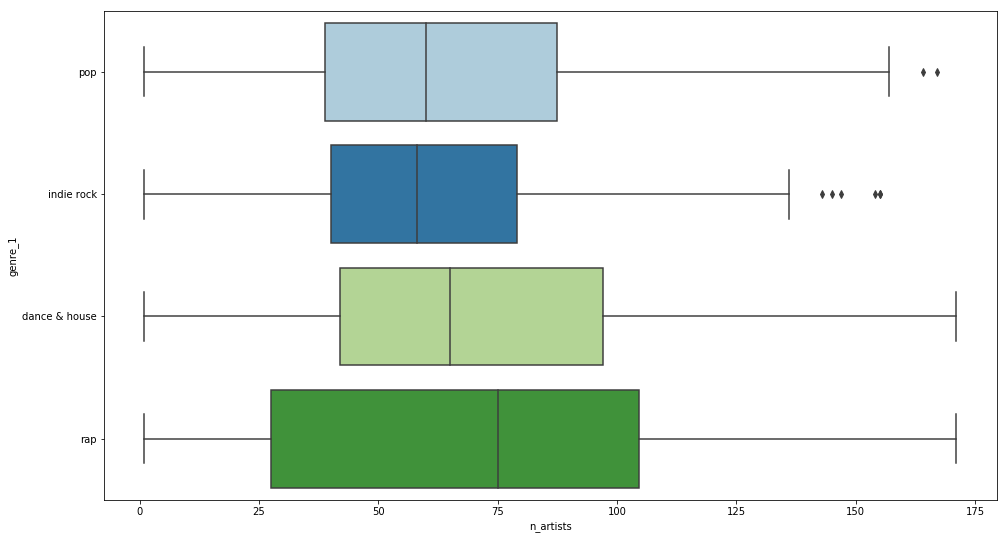

In [32]:
f, ax = plt.subplots(figsize=(16,9))
sb.boxplot(x='n_artists', y='genre_1', data=df_cluster_1[df_cluster_1['n_artists'] <= 171], palette=color_palette)
# take out extreme values above 75th percentile

In [33]:
df_cluster_1.groupby(['genre_1'])[['n_tracks']].median()

,n_tracks
genre_1,
dance & house,145.5
indie rock,100.0
pop,106.0
rap,118.5


In [35]:
df_cluster_1[(df_cluster_1['n_artists'] <= 171) & (df_cluster_1['genre_1'] == 'pop')].describe()

,streams,stream30s,dau,wau,mau,mau_previous_month,mau_both_months,users,skippers,n_tracks,n_local_tracks,n_artists,n_albums,monthly_stream30s,monthly_owner_stream30s,x_estimated_revenue_usd,x_ratio_streams_above_30s_threshold,x_retention_rate_m,x_ratio_skippers_d,x_projected_engaging_time_in_min,x_projected_engaging_time_in_hour,x_projected_engaging_time_in_day,x_mininum_engaing_time_per_user
count,1.360000e+02,1.360000e+02,136.000000,136.000000,1.360000e+02,1.360000e+02,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,8.173840e+04,4.827540e+04,4649.419118,21456.088235,6.394782e+04,5.238813e+04,14387.389706,1.308676e+05,2747.250000,109.205882,1.088235,65.558824,69.294118,1.318852e+06,114.933824,337.927779,0.615514,0.185203,0.019604,382.220588,6.370809,0.265368,0.328897
std,3.267362e+05,1.885260e+05,17663.249684,76540.580064,2.220195e+05,1.639563e+05,60858.185343,3.979264e+05,9607.803732,89.499855,9.393828,39.223342,44.283450,5.235094e+06,804.255342,1319.682052,0.152375,0.093059,0.014535,313.249491,5.221070,0.217739,1.874038
min,6.150000e+02,5.000000e+02,1.000000,1.000000,2.000000e+00,0.000000e+00,0.000000,1.400000e+01,1.000000,1.000000,0.000000,1.000000,1.000000,5.505000e+03,0.000000,3.500000,0.271600,0.000000,0.005400,3.500000,0.060000,0.000000,0.010000
25%,1.385250e+03,7.887500e+02,81.250000,411.750000,1.418750e+03,1.205250e+03,202.250000,3.184750e+03,56.750000,50.000000,0.000000,38.750000,39.000000,2.662825e+04,0.000000,5.521250,0.503625,0.128000,0.012250,175.000000,2.920000,0.120000,0.080000
50%,3.741500e+03,2.049500e+03,243.000000,1509.500000,4.593000e+03,3.671500e+03,554.000000,1.124850e+04,195.500000,80.500000,0.000000,60.000000,61.000000,6.179000e+04,1.000000,14.346500,0.618300,0.167900,0.016150,281.750000,4.700000,0.195000,0.125000
75%,2.178475e+04,1.319675e+04,1407.250000,7949.000000,2.570025e+04,2.788425e+04,4052.500000,6.931800e+04,1238.750000,148.500000,0.000000,87.500000,95.000000,4.193518e+05,24.000000,92.377250,0.721375,0.226075,0.022225,519.750000,8.667500,0.362500,0.210000
max,2.629715e+06,1.513237e+06,152929.000000,669966.000000,1.944150e+06,1.478684e+06,578391.000000,3.455406e+06,86162.000000,492.000000,109.000000,167.000000,196.000000,4.249733e+07,9170.000000,10592.659000,0.998400,0.604600,0.121000,1722.000000,28.700000,1.200000,21.930000


In [36]:
df_cluster_1[(df_cluster_1['n_artists'] <= 171) & (df_cluster_1['genre_1'] == 'indie rock')].describe()

,streams,stream30s,dau,wau,mau,mau_previous_month,mau_both_months,users,skippers,n_tracks,n_local_tracks,n_artists,n_albums,monthly_stream30s,monthly_owner_stream30s,x_estimated_revenue_usd,x_ratio_streams_above_30s_threshold,x_retention_rate_m,x_ratio_skippers_d,x_projected_engaging_time_in_min,x_projected_engaging_time_in_hour,x_projected_engaging_time_in_day,x_mininum_engaing_time_per_user
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,9.700000e+01,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,28925.690722,21193.876289,2017.474227,13345.422680,39045.041237,34399.515464,6970.711340,91144.989691,1313.350515,103.876289,0.123711,62.515464,68.463918,7.017946e+05,30.639175,148.357134,0.709919,0.187714,0.018178,363.567010,6.060206,0.252371,0.414536
std,52030.405829,41909.061599,3408.946703,23633.200754,66503.020099,67056.831187,16500.201773,157238.299297,2116.851480,96.873227,0.739619,37.924847,41.597291,1.460536e+06,159.972666,293.363431,0.119000,0.122331,0.014878,339.056293,5.651256,0.235482,2.604509
min,580.000000,532.000000,2.000000,3.000000,8.000000,0.000000,0.000000,11.000000,1.000000,16.000000,0.000000,1.000000,1.000000,1.687000e+03,0.000000,3.724000,0.377000,0.000000,0.004400,56.000000,0.930000,0.040000,0.010000
25%,2023.000000,1437.000000,132.000000,848.000000,2583.000000,1536.000000,310.000000,6507.000000,118.000000,50.000000,0.000000,40.000000,43.000000,4.287500e+04,0.000000,10.059000,0.644200,0.111400,0.010000,175.000000,2.920000,0.120000,0.060000
50%,6448.000000,4979.000000,499.000000,3666.000000,12311.000000,9008.000000,958.000000,29476.000000,377.000000,77.000000,0.000000,58.000000,62.000000,1.792010e+05,1.000000,34.853000,0.744200,0.163600,0.014900,269.500000,4.490000,0.190000,0.120000
75%,30426.000000,21370.000000,2247.000000,13358.000000,41802.000000,28268.000000,5452.000000,95605.000000,1574.000000,118.000000,0.000000,79.000000,83.000000,6.431260e+05,6.000000,149.590000,0.781600,0.217500,0.019600,413.000000,6.880000,0.290000,0.200000
max,353630.000000,322268.000000,19029.000000,143516.000000,352464.000000,395305.000000,101214.000000,910599.000000,12187.000000,576.000000,6.000000,155.000000,191.000000,1.053618e+07,1523.000000,2255.876000,0.977600,0.697600,0.090900,2016.000000,33.600000,1.400000,25.770000


In [37]:
df_cluster_1[(df_cluster_1['n_artists'] <= 171) & (df_cluster_1['genre_1'] == 'dance & house')].describe()

,streams,stream30s,dau,wau,mau,mau_previous_month,mau_both_months,users,skippers,n_tracks,n_local_tracks,n_artists,n_albums,monthly_stream30s,monthly_owner_stream30s,x_estimated_revenue_usd,x_ratio_streams_above_30s_threshold,x_retention_rate_m,x_ratio_skippers_d,x_projected_engaging_time_in_min,x_projected_engaging_time_in_hour,x_projected_engaging_time_in_day,x_mininum_engaing_time_per_user
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,33585.704918,19501.901639,2502.868852,11429.229508,38261.114754,43148.508197,7330.098361,108467.442623,2062.213115,124.377049,0.278689,67.885246,68.196721,5.167632e+05,100.934426,136.513311,0.590530,0.202892,0.034485,435.319672,7.255410,0.301803,1.112623
std,68115.580055,38565.303253,4930.307423,20437.286837,68897.720161,86669.722628,15540.928004,198394.830099,3981.566535,97.989143,0.985413,39.237779,42.035231,9.838702e+05,639.418508,269.957123,0.139722,0.116108,0.098339,342.962000,5.715827,0.238296,7.576182
min,594.000000,531.000000,1.000000,1.000000,2.000000,0.000000,0.000000,5.000000,1.000000,22.000000,0.000000,1.000000,1.000000,8.600000e+02,0.000000,3.717000,0.274800,0.000000,0.003800,77.000000,1.280000,0.050000,0.020000
25%,1265.000000,737.000000,82.000000,429.000000,1252.000000,1032.000000,229.000000,2635.000000,59.000000,55.000000,0.000000,42.000000,41.000000,2.516600e+04,0.000000,5.159000,0.486900,0.124600,0.014700,192.500000,3.210000,0.130000,0.060000
50%,3863.000000,2175.000000,252.000000,1638.000000,5212.000000,4241.000000,654.000000,19572.000000,285.000000,90.000000,0.000000,65.000000,64.000000,6.930100e+04,2.000000,15.225000,0.564200,0.172800,0.019200,315.000000,5.250000,0.220000,0.090000
75%,24014.000000,14335.000000,1808.000000,11182.000000,36847.000000,50750.000000,7074.000000,136056.000000,1503.000000,174.000000,0.000000,97.000000,98.000000,4.639600e+05,14.000000,100.345000,0.677600,0.241000,0.024600,609.000000,10.150000,0.420000,0.160000
max,306687.000000,169082.000000,19631.000000,79911.000000,278966.000000,448102.000000,75371.000000,917174.000000,17022.000000,402.000000,5.000000,171.000000,169.000000,4.178965e+06,4998.000000,1183.574000,0.998300,0.567900,0.766100,1407.000000,23.450000,0.980000,59.300000


In [38]:
df_cluster_1[(df_cluster_1['n_artists'] <= 171) & (df_cluster_1['genre_1'] == 'rap')].describe()

,streams,stream30s,dau,wau,mau,mau_previous_month,mau_both_months,users,skippers,n_tracks,n_local_tracks,n_artists,n_albums,monthly_stream30s,monthly_owner_stream30s,x_estimated_revenue_usd,x_ratio_streams_above_30s_threshold,x_retention_rate_m,x_ratio_skippers_d,x_projected_engaging_time_in_min,x_projected_engaging_time_in_hour,x_projected_engaging_time_in_day,x_mininum_engaing_time_per_user
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,7.500000e+01,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,10191.786667,5012.133333,622.866667,3330.333333,11022.533333,10035.013333,1902.173333,26757.573333,484.333333,114.533333,1.560000,72.506667,69.093333,1.520833e+05,812.160000,35.084933,0.525844,0.222391,0.020123,400.866667,6.681600,0.278000,5.017867
std,26242.496035,13038.988234,1747.127785,10165.960400,30827.754758,28468.624971,6383.810733,73962.631728,1331.969029,112.933888,5.650257,51.236171,49.201509,4.221175e+05,3604.919064,91.272918,0.189430,0.164741,0.012193,395.268608,6.587466,0.274689,20.646223
min,687.000000,500.000000,1.000000,1.000000,3.000000,0.000000,0.000000,3.000000,0.000000,4.000000,0.000000,1.000000,1.000000,5.439000e+03,0.000000,3.500000,0.082200,0.000000,0.000000,14.000000,0.230000,0.010000,0.020000
25%,1298.500000,721.500000,81.500000,381.500000,1173.500000,1027.000000,158.500000,2642.000000,47.000000,44.000000,0.000000,27.500000,24.500000,1.751200e+04,0.000000,5.050500,0.435100,0.134250,0.015400,154.000000,2.570000,0.105000,0.070000
50%,2332.000000,1025.000000,108.000000,560.000000,1838.000000,1676.000000,344.000000,4329.000000,81.000000,95.000000,0.000000,75.000000,63.000000,2.862400e+04,5.000000,7.175000,0.468100,0.178400,0.018600,332.500000,5.540000,0.230000,0.110000
75%,7043.000000,3326.000000,351.500000,2065.000000,6397.000000,5723.000000,1150.000000,15821.000000,342.000000,138.500000,0.000000,104.500000,105.500000,1.176100e+05,65.500000,23.282000,0.572200,0.248100,0.022850,484.750000,8.080000,0.335000,0.205000
max,192830.000000,95495.000000,13254.000000,81365.000000,235591.000000,223459.000000,52295.000000,572246.000000,10163.000000,692.000000,41.000000,171.000000,169.000000,3.249247e+06,25904.000000,668.465000,1.000000,1.000000,0.083500,2422.000000,40.370000,1.680000,141.830000
